In [1]:
from activations import Activations

import numpy as np
import matplotlib.pyplot as plt

from gtda.diagrams import PairwiseDistance

import collections

from scipy.cluster.hierarchy import cut_tree, linkage
from scipy.spatial.distance import squareform as cdm

In [2]:
basepath = '../../trained_models/'
file = '10kbatches/steps_20_batch_200_RNN_512_relu_rf_012_DoG_True_plane_lr_00001_weight_decay_00001/activations.npy'
path = basepath + file

ratemaps = np.load(path)

activations = Activations(ratemaps)

In [3]:
sacs = activations.calculate_sacs()

In [4]:
dgms = activations.calculate_dgms(digits=2)

In [5]:
pairdis = PairwiseDistance(metric='silhouette',metric_params={'p':100},order=None)
D = pairdis.fit_transform(dgms)

/home/simone/anaconda3/envs/gc/lib/python3.7/site-packages/gtda/diagrams/_metrics.py:142: RuntimeWarning: invalid value encountered in true_divide
  fibers_weighted_sum = np.sum(weights*fibers, axis=1)/total_weights


In [6]:
D0 = D[:,:,0]
#condense distance matrix as a flat array
Df = cdm(D0)

In [7]:
zward = linkage(Df,method='ward')
zweighted = linkage(Df,method='weighted')

In [9]:
czward = cut_tree(zward,4)
czweighted = cut_tree(zweighted,4)

# Ward linkage


Cluster0


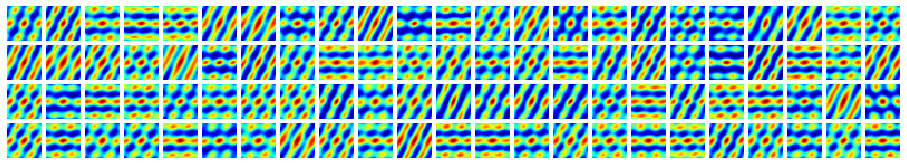


Cluster1


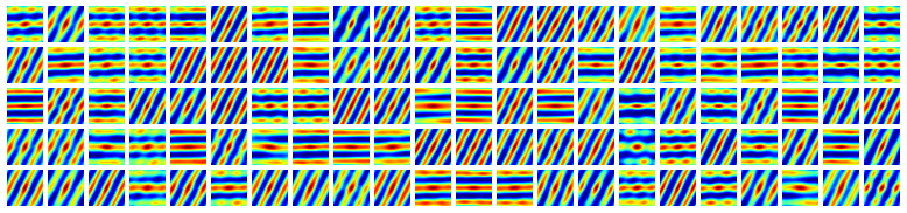


Cluster2


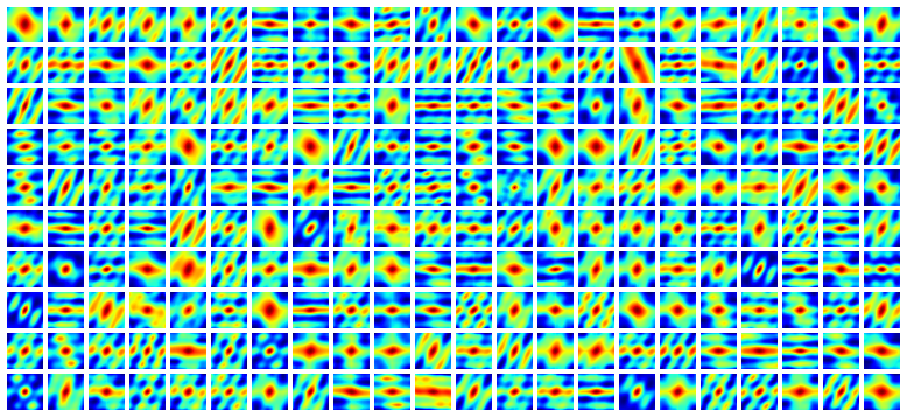


Cluster3


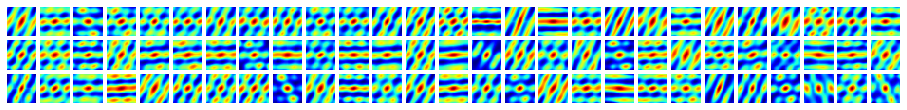

In [10]:
activations.viz_clusters(czward, activations.sacs_,n_col=22)

# Ratemaps with ward linkage


Cluster0


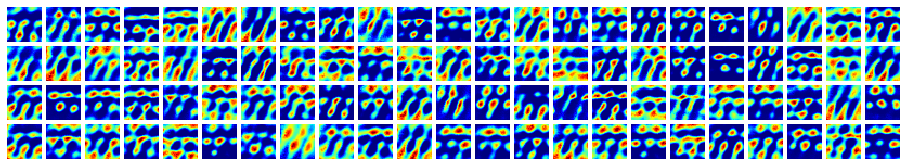


Cluster1


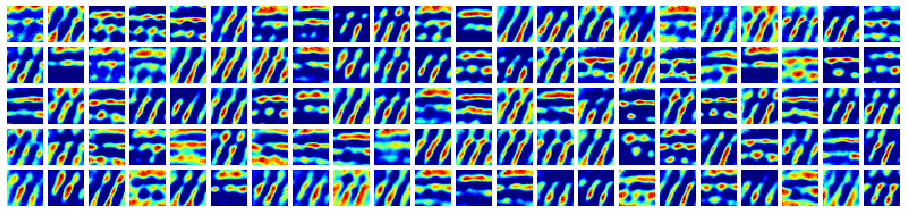


Cluster2


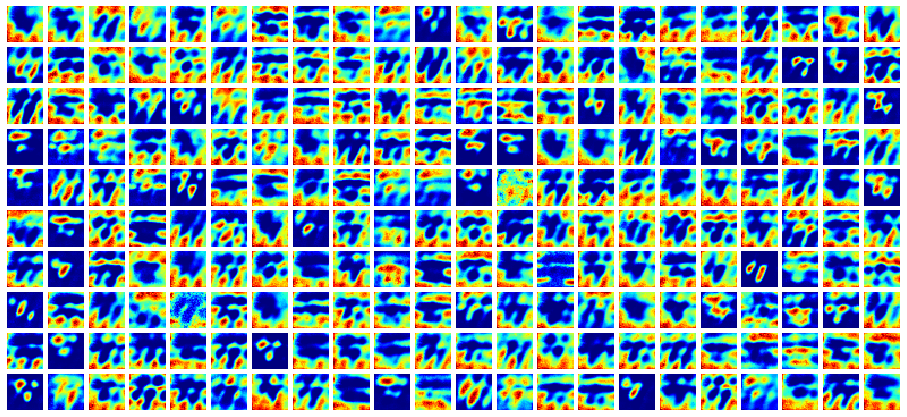


Cluster3


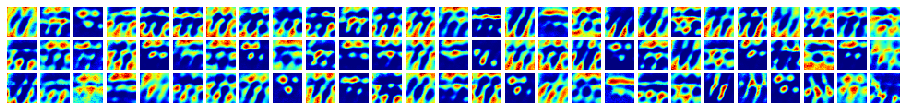

In [12]:
activations.viz_clusters(czward,activations.ratemaps_,n_col=22)

# Weighted linkage


Cluster0


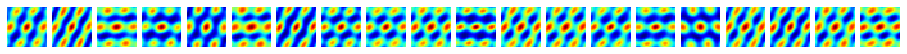


Cluster1


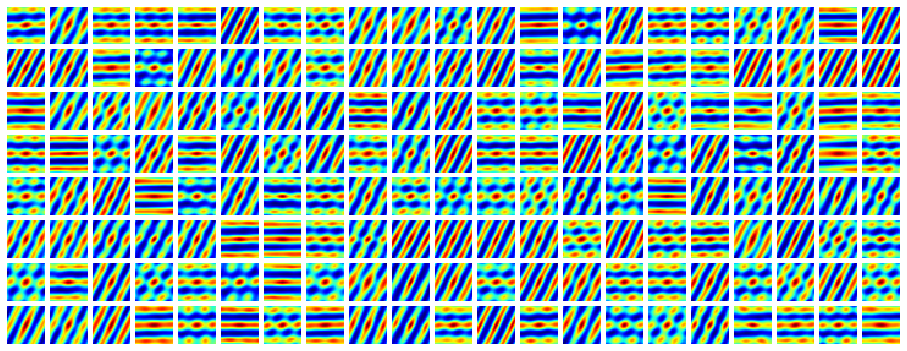


Cluster2


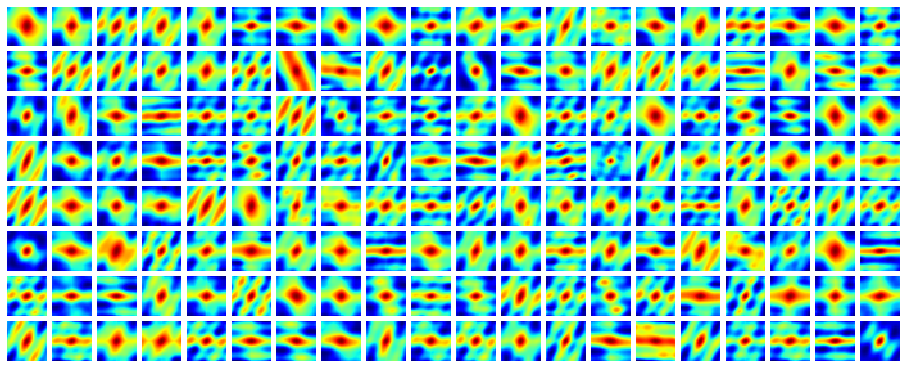


Cluster3


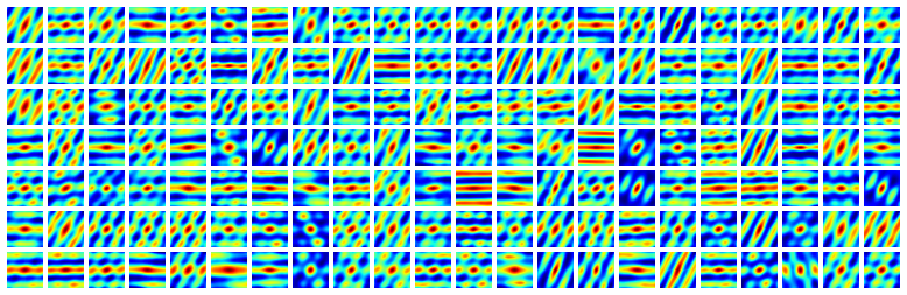

In [13]:
activations.viz_clusters(czweighted,activations.sacs_,n_col=20)

# Ratemaps with weighted linkage


Cluster0


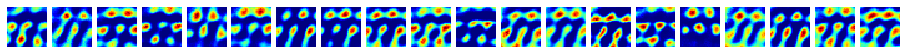


Cluster1


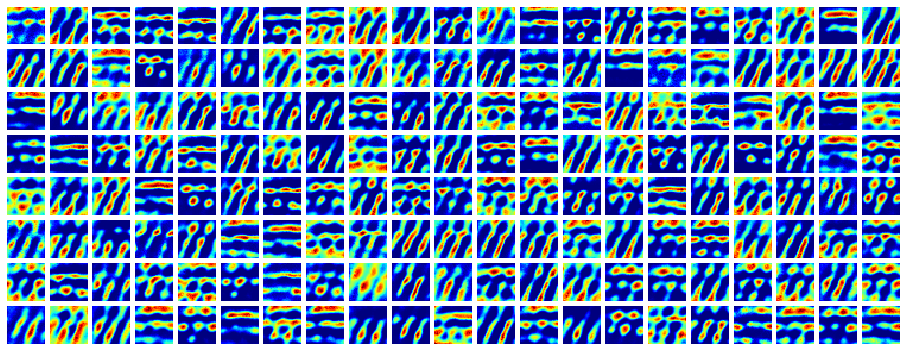


Cluster2


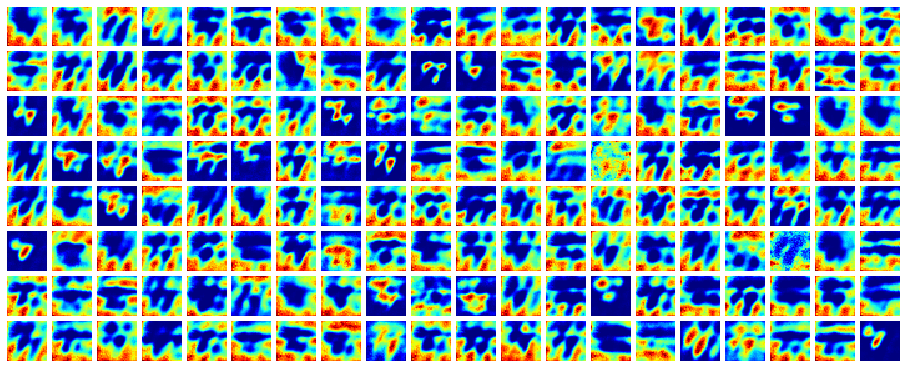


Cluster3


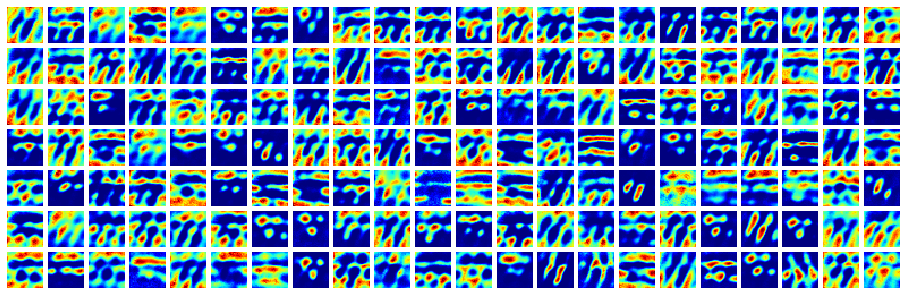

In [14]:
activations.viz_clusters(czweighted,activations.ratemaps_,n_col=20)

# Validate clusters with scores

In [15]:
scores = activations.scores()

In [16]:
scores_60, idxs = scores

In [17]:
from collections import defaultdict

In [18]:
score_distro_ward = defaultdict(list)
score_distro_weighted = defaultdict(list)

czward = czward.reshape(512)
czweighted = czweighted.reshape(512)

#scores_60_round = np.array(scores_60).round(2)

for i in range(len(scores_60)):
    score_distro_ward['cluster'+str(czward[i])].append((scores_60[i].round(2)))
    
for i in range(len(scores_60)):
    score_distro_weighted['cluster'+str(czweighted[i])].append((scores_60[i].round(2)))

In [20]:
#check consistency
unique, counts = np.unique(czweighted, return_counts=True)
print(dict(zip(unique, counts)))

for cl in score_distro_weighted.keys():
    print(cl, len(score_distro_weighted[cl]))

{0: 20, 1: 170, 2: 165, 3: 157}
cluster0 20
cluster1 170
cluster2 165
cluster3 157


In [62]:
from scipy.stats import ks_2samp
from itertools import combinations

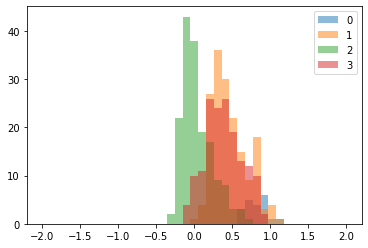

In [63]:
bins = np.linspace(-2, 2, 40)

plt.hist(score_distro_weighted['cluster0'], bins, alpha=0.5, label='0')
plt.hist(score_distro_weighted['cluster1'], bins, alpha=0.5, label='1')
plt.hist(score_distro_weighted['cluster2'], bins, alpha=0.5, label='2')
plt.hist(score_distro_weighted['cluster3'], bins, alpha=0.5, label='3')
plt.legend(loc='upper right')
plt.show()

In [64]:
for c in combinations(np.unique(czweighted),2):
    c0 = 'cluster'+str(c[0])
    c1 = 'cluster'+str(c[1])
    stat,p = ks_2samp(score_distro_weighted[c0],score_distro_weighted[c1])
    print('Comparison ' + c0 + ' ' + c1 + ':  stat=' + str(stat) + '   p-value=' + str(p))                                     

Comparison cluster0 cluster1:  stat=0.7352941176470589   p-value=3.4003133642102057e-10
Comparison cluster0 cluster2:  stat=0.9757575757575757   p-value=3.3306690738754696e-16
Comparison cluster0 cluster3:  stat=0.7707006369426752   p-value=3.148381555462265e-11
Comparison cluster1 cluster2:  stat=0.7285204991087344   p-value=1.2212453270876722e-15
Comparison cluster1 cluster3:  stat=0.1626451854627201   p-value=0.02275259759276438
Comparison cluster2 cluster3:  stat=0.5989577301679212   p-value=5.551115123125783e-16


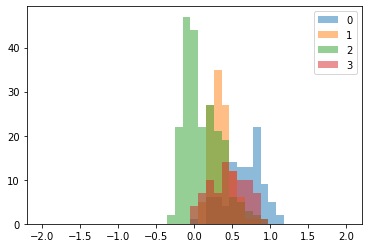

In [65]:
bins = np.linspace(-2, 2, 40)

plt.hist(score_distro_ward['cluster0'], bins, alpha=0.5, label='0')
plt.hist(score_distro_ward['cluster1'], bins, alpha=0.5, label='1')
plt.hist(score_distro_ward['cluster2'], bins, alpha=0.5, label='2')
plt.hist(score_distro_ward['cluster3'], bins, alpha=0.5, label='3')
plt.legend(loc='upper right')
plt.show()

In [66]:
for c in combinations(np.unique(czward),2):
    c0 = 'cluster'+str(c[0])
    c1 = 'cluster'+str(c[1])
    stat,p = ks_2samp(score_distro_ward[c0],score_distro_ward[c1])
    print('Comparison ' + c0 + ' ' + c1 + ':  stat=' + str(stat) + '   p-value=' + str(p))                           

Comparison cluster0 cluster1:  stat=0.6456140350877193   p-value=1.1102230246251565e-16
Comparison cluster0 cluster2:  stat=0.7530840676351512   p-value=7.771561172376096e-16
Comparison cluster0 cluster3:  stat=0.37265725288831836   p-value=5.6583302607826624e-06
Comparison cluster1 cluster2:  stat=0.5890688259109311   p-value=1.4432899320127035e-15
Comparison cluster1 cluster3:  stat=0.35922122379118526   p-value=5.333320653888585e-06
Comparison cluster2 cluster3:  stat=0.5294669462531729   p-value=1.5543122344752192e-15


# Binning

In [26]:
bins = np.linspace(-2,2,40)
prova = np.digitize(score_distro_weighted['cluster0'],bins)
#prova.tolist()

In [43]:
np.linspace(-1,1,20)

array([-1.        , -0.89473684, -0.78947368, -0.68421053, -0.57894737,
       -0.47368421, -0.36842105, -0.26315789, -0.15789474, -0.05263158,
        0.05263158,  0.15789474,  0.26315789,  0.36842105,  0.47368421,
        0.57894737,  0.68421053,  0.78947368,  0.89473684,  1.        ])

In [67]:
bins = np.linspace(-2,2,40)

score_distro_weighted_b = defaultdict(list)
score_distro_ward_b = defaultdict(list)

for key in score_distro_weighted.keys():
    binning = np.digitize(score_distro_weighted[key],bins)
    binning = binning.tolist()
    score_distro_weighted_b[key] = binning
    
for key in score_distro_ward.keys():
    binning = np.digitize(score_distro_ward[key],bins)
    binning = binning.tolist()
    score_distro_ward_b[key] = binning

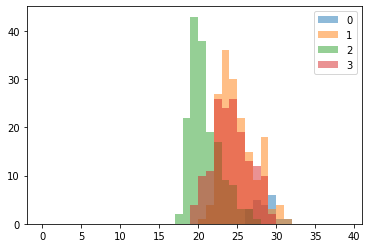

In [70]:
bins = np.arange(40)

plt.hist(score_distro_weighted_b['cluster0'], bins, alpha=0.5, label='0')
plt.hist(score_distro_weighted_b['cluster1'], bins, alpha=0.5, label='1')
plt.hist(score_distro_weighted_b['cluster2'], bins, alpha=0.5, label='2')
plt.hist(score_distro_weighted_b['cluster3'], bins, alpha=0.5, label='3')
plt.legend(loc='upper right')
plt.show()

In [73]:
for c in combinations(np.unique(czweighted),2):
    c0 = 'cluster'+str(c[0])
    c1 = 'cluster'+str(c[1])
    stat,p = ks_2samp(score_distro_weighted_b[c0],score_distro_weighted_b[c1])
    print('Comparison ' + c0 + ' ' + c1 + ':  stat=' + str(stat) + '   p-value=' + str(p))                                

Comparison cluster0 cluster1:  stat=0.7058823529411765   p-value=2.6163534672107858e-09
Comparison cluster0 cluster2:  stat=0.9757575757575757   p-value=3.3306690738754696e-16
Comparison cluster0 cluster3:  stat=0.7643312101910829   p-value=5.147060555543703e-11
Comparison cluster1 cluster2:  stat=0.7221033868092691   p-value=1.2212453270876722e-15
Comparison cluster1 cluster3:  stat=0.13660547021356315   p-value=0.08363625729877544
Comparison cluster2 cluster3:  stat=0.5922794827253426   p-value=5.551115123125783e-16


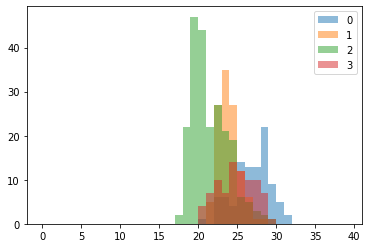

In [74]:
bins = np.arange(40)

plt.hist(score_distro_ward_b['cluster0'], bins, alpha=0.5, label='0')
plt.hist(score_distro_ward_b['cluster1'], bins, alpha=0.5, label='1')
plt.hist(score_distro_ward_b['cluster2'], bins, alpha=0.5, label='2')
plt.hist(score_distro_ward_b['cluster3'], bins, alpha=0.5, label='3')
plt.legend(loc='upper right')
plt.show()

In [75]:
for c in combinations(np.unique(czward),2):
    c0 = 'cluster'+str(c[0])
    c1 = 'cluster'+str(c[1])
    stat,p = ks_2samp(score_distro_ward_b[c0],score_distro_ward_b[c1])
    print('Comparison ' + c0 + ' ' + c1 + ':  stat=' + str(stat) + '   p-value=' + str(p))                             

Comparison cluster0 cluster1:  stat=0.6456140350877193   p-value=1.1102230246251565e-16
Comparison cluster0 cluster2:  stat=0.7441295546558705   p-value=7.771561172376096e-16
Comparison cluster0 cluster3:  stat=0.3332477535301669   p-value=7.439624081784224e-05
Comparison cluster1 cluster2:  stat=0.5760498531396364   p-value=1.4432899320127035e-15
Comparison cluster1 cluster3:  stat=0.3123662815575524   p-value=0.00012403577634478857
Comparison cluster2 cluster3:  stat=0.4956406577640437   p-value=6.206146707654625e-14
